<a href="https://colab.research.google.com/github/Vaani64/Deep_Learning_Codes/blob/main/Comparing_SGD_and_Adam_Optimizers_in_Training_a_Neural_Network_on_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training with SGD optimizer:
Epoch 1/50 - SGD Loss: 1.0210
Epoch 2/50 - SGD Loss: 0.9773
Epoch 3/50 - SGD Loss: 0.9553
Epoch 4/50 - SGD Loss: 0.9397
Epoch 5/50 - SGD Loss: 0.9306
Epoch 6/50 - SGD Loss: 0.9230
Epoch 7/50 - SGD Loss: 0.9143
Epoch 8/50 - SGD Loss: 0.9082
Epoch 9/50 - SGD Loss: 0.9012
Epoch 10/50 - SGD Loss: 0.8942
Epoch 11/50 - SGD Loss: 0.8877
Epoch 12/50 - SGD Loss: 0.8840
Epoch 13/50 - SGD Loss: 0.8794
Epoch 14/50 - SGD Loss: 0.8749
Epoch 15/50 - SGD Loss: 0.8717
Epoch 16/50 - SGD Loss: 0.8680
Epoch 17/50 - SGD Loss: 0.8622
Epoch 18/50 - SGD Loss: 0.8564
Epoch 19/50 - SGD Loss: 0.8550
Epoch 20/50 - SGD Loss: 0.8526
Epoch 21/50 - SGD Loss: 0.8468
Epoch 22/50 - SGD Loss: 0.8437
Epoch 23/50 - SGD Loss: 0.8399
Epoch 24/50 - SGD Loss: 0.8371
Epoch 25/50 - SGD Loss: 0.8336
Epoch 26/50 - SGD Loss: 0.8282
Epoch 27/50 - SGD Loss: 0.8267
Epoch 28/50 - SGD Loss: 0.8236
Epoch 29/50 - SGD Loss: 0.8191
Epoch 30/50 - SGD Loss: 0.8179
Epoch 31/50 - SGD Loss: 0.8138
Epoch 32/50 - SGD 

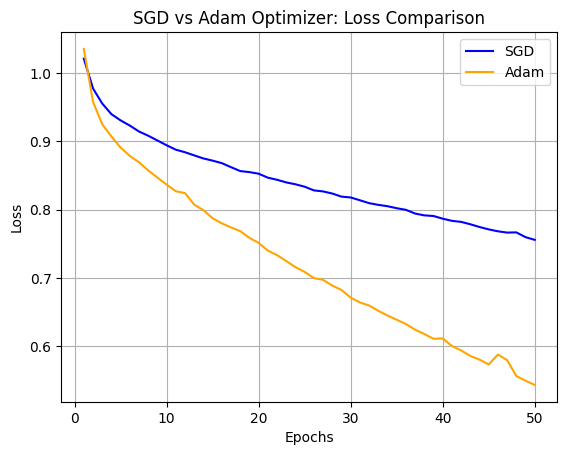

In [2]:
#import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# 1. Create synthetic data
def create_data():
    X = np.random.randn(1000, 10)  # 1000 samples, 10 features
    y = np.random.randn(1000, 1)   # 1000 samples, 1 target (regression task)
    return X, y

# 2. Define a simple deep neural network
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),  # input layer with 10 features, 50 neurons
        layers.Dense(20, activation='relu'),  # hidden layer with 20 neurons
        layers.Dense(1)  # output layer (regression, single output)
    ])
    return model

# 3. Train and capture loss values, showing the loss per epoch
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []

    # Training loop to print loss at each epoch
    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} Loss: {loss:.4f}")

    return history

# 4. Compare performance of SGD and Adam
X, y = create_data()

# Create models for SGD and Adam
model_sgd = create_model()
model_adam = create_model()

# Optimizers
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

epochs = 50
batch_size = 32

print("\nTraining with SGD optimizer:")
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam optimizer:")
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

# 5. Plot the loss curves for comparison
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()
